# Exploratory data analysis (EDA) for Haberman dataset

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# loading data from haberman.csv into a pandas datarame
haberman_df = pd.read_csv("haberman.csv",names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years'])

# Checking data is load or not  and if loaded then size of data
print(haberman_df.shape)
print(haberman_df.head())

(306, 4)
   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


In [132]:
print(haberman_df.columns)
print(haberman_df['survival_status_after_5_years'].value_counts());

Index(['age', 'year_of_treatment', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')
1    225
2     81
Name: survival_status_after_5_years, dtype: int64


In [133]:
# Mapping the coloumn survival_status_after_5_year into readable format
haberman_df['survival_status_after_5_years'] = haberman_df['survival_status_after_5_years'].map({1: 'survived', 2 : 'died'})

In [134]:
haberman_df.head()

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [135]:
haberman_df.info()
haberman_df['survival_status_after_5_years'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


array(['survived', 'died'], dtype=object)

In [136]:
haberman_df.describe()

,age,year_of_treatment,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observation

 1.There are no missing values in this data set. So there is no need to do data imputation.
 
 2.Total number of points is 306.
 
 3.Total number of numer of features is 3
 
 4.Total number of classes is 2
 
 5.Total number of data-points of class 1 (Survived)is 225 and total number of class 2 (died) is 81,It shows that,this is          unbalanced dataset

# Univariate Analysis

In [137]:
# Extracting rows on the basis of different class
haberman_survived = haberman_df.loc[haberman_df['survival_status_after_5_years'] == 'survived']
haberman_died = haberman_df.loc[haberman_df['survival_status_after_5_years'] == 'died']

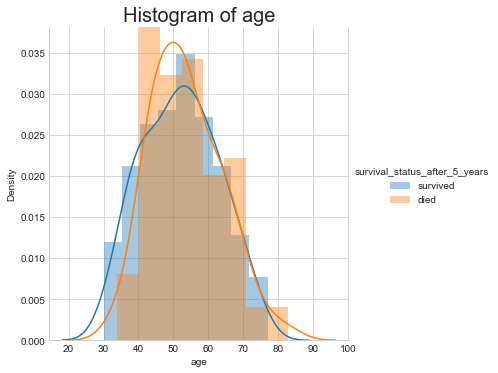

In [138]:
# plotting age features 
sns.FacetGrid(haberman_df, hue= 'survival_status_after_5_years',size=5).map(sns.distplot,"age").add_legend();
plt.title("Histogram of age",fontsize=20)
plt.ylabel("Density")
plt.show()

# Observations

1. under age of 34 , there is very more chance to survive.
2. After age of 76 , there is very less chance to survive.
3. As their is much Overlapping in the Histogram of age feature, so this unique age feature cannot be deciding feature alone  for deciding survival_status_after_5_years.

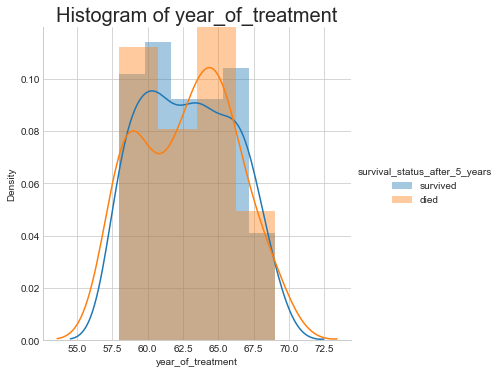

In [139]:
#plotting year_of_treatment features
sns.FacetGrid(haberman_df, hue='survival_status_after_5_years',size=5).map(sns.distplot,'year_of_treatment').add_legend();
plt.title("Histogram of year_of_treatment",fontsize=20)
plt.ylabel("Density")
plt.show()

# Observation

1. As their is much Overlapping in the Histogram of year_of_treatment feature, so this unique year_of_treatment feature cannot be deciding feature alone for survival_status_after_5_years.

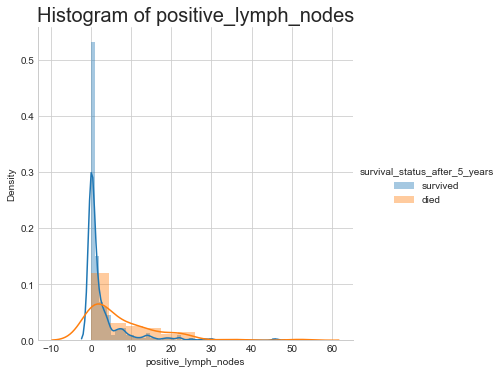

In [140]:
# Plotting positive_lymph_nodes Features
sns.FacetGrid(haberman_df,hue="survival_status_after_5_years", size=5).map(sns.distplot,'positive_lymph_nodes').add_legend()
plt.title("Histogram of positive_lymph_nodes",fontsize=20)
plt.ylabel("Density")
plt.show();

# Observation

1. Patients having less than 4 postive_lymph_nodes , chances of their survival is more. 
2. Patients having more than 10 postive_lymph_nodes , chances of their survival is less.

# PDF and CDF of Different Features

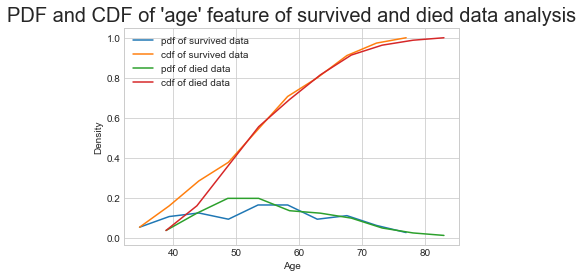

In [141]:
# Plotting of PDF and CDF of "age"

#survived data analysis 

label = ["pdf of survived data", "cdf of survived data", "pdf of died data", "cdf of died data"]
counts, bin_edges = np.histogram(haberman_survived['age'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# died data analysis
counts, bin_edges = np.histogram(haberman_died['age'], bins= 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("PDF and CDF of 'age' feature of survived and died data analysis",fontsize=20)
plt.ylabel("Density")
plt.xlabel("Age")
plt.legend(label)
plt.show()


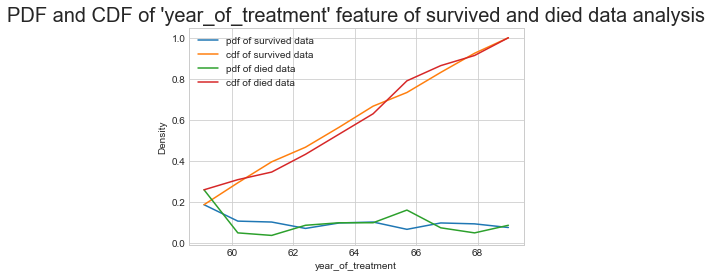

In [142]:
# Plotting of PDF and CDF of "year_of_treatment"

#survived data analysis 

counts, bin_edges = np.histogram(haberman_survived['year_of_treatment'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# died data analysis
counts, bin_edges = np.histogram(haberman_died['year_of_treatment'], bins = 10, density= True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("PDF and CDF of 'year_of_treatment' feature of survived and died data analysis",fontsize=20)
plt.ylabel("Density")
plt.xlabel("year_of_treatment")
plt.legend(label)
plt.show()

# Observation

1. In peroid of 1965-1968,there is drastically decrease in death of the patient,may be due to increse in the technology.

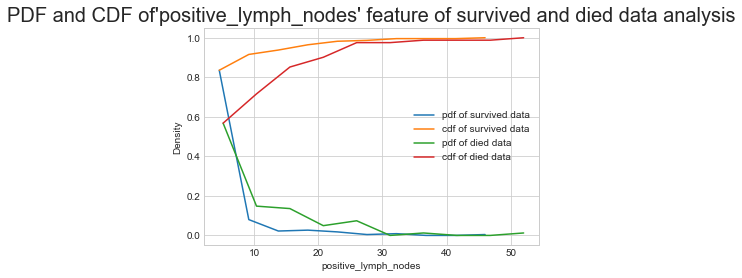

In [143]:
# Plotting of PDF and CDF of "positive_lymph_nodes"

#survived data analysis 

counts, bin_edges = np.histogram(haberman_survived['positive_lymph_nodes'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# died data analysis
counts, bin_edges = np.histogram(haberman_died['positive_lymph_nodes'], bins = 10, density= True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("PDF and CDF of'positive_lymph_nodes' feature of survived and died data analysis",fontsize=20)
plt.ylabel("Density")
plt.xlabel("positive_lymph_nodes")
plt.legend(label)
plt.show()

# Boxplot and Whiskers of different Features

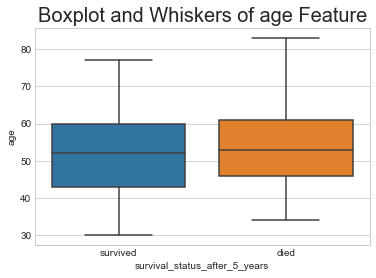

In [144]:
# Boxplot of "age"
sns.boxplot(x='survival_status_after_5_years', y = 'age', data= haberman_df)
plt.title("Boxplot and Whiskers of age Feature",fontsize=20)
plt.show()

# Observation

1. Most of the people survived between age 43 to 60 and most of the people died is age between 45 to 62

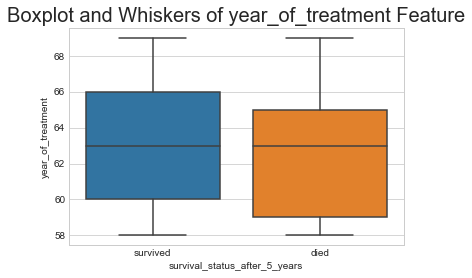

In [145]:
# Boxplot of "year_of_treatment"
sns.boxplot(x='survival_status_after_5_years', y = 'year_of_treatment', data= haberman_df)
plt.title("Boxplot and Whiskers of year_of_treatment Feature",fontsize=20)
plt.show()

# Observation

1. Most of the people survived during 1960-1966 year of treatment and most of the died during 1955-1963.so we can conclude as techonolgy advanced, the number of surival increase.

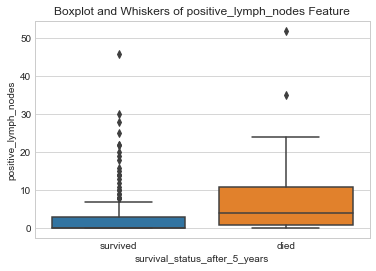

In [146]:
# Boxplot of "positive_lymph_nodes"
sns.boxplot(x='survival_status_after_5_years', y = 'positive_lymph_nodes', data= haberman_df)
plt.title("Boxplot and Whiskers of positive_lymph_nodes Feature")
plt.show()

# Observation

1.Most of the people survived, having less than 4 positive_lymph_nodes.

# Violin Plots of different Fetures

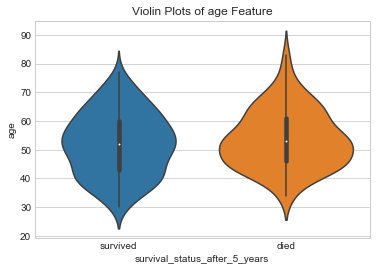

In [147]:
# violin plot of "age"
sns.violinplot(x='survival_status_after_5_years', y = 'age', data= haberman_df)
plt.title("Violin Plots of age Feature")
plt.show()

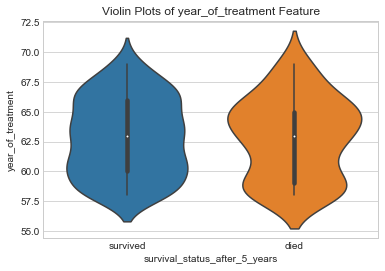

In [148]:
# violin plot of "year_of_treatment"
sns.violinplot(x='survival_status_after_5_years', y = 'year_of_treatment', data= haberman_df)
plt.title("Violin Plots of year_of_treatment Feature")
plt.show()

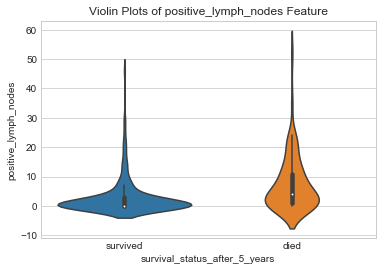

In [149]:
# violin plot of "positive_lymph_nodes"
sns.violinplot(x='survival_status_after_5_years', y = 'positive_lymph_nodes', data= haberman_df)
plt.title("Violin Plots of positive_lymph_nodes Feature")
plt.show()

# Conclusion

1.So after Univariate Analysis we can conclude that individually 'positive_lymph_nodes'  is the only most important Features for Classification

# BiVariate Analysis 

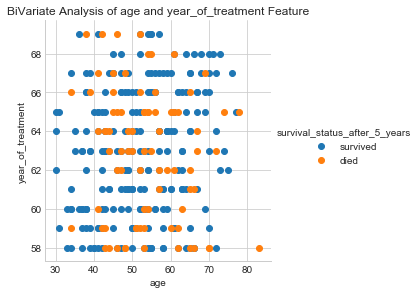

In [150]:
# Scatter Plot

sns.set_style("whitegrid");
sns.FacetGrid(haberman_df ,hue="survival_status_after_5_years",size=4).map(plt.scatter,"age","year_of_treatment").add_legend();
plt.title("BiVariate Analysis of age and year_of_treatment Feature")
plt.show()


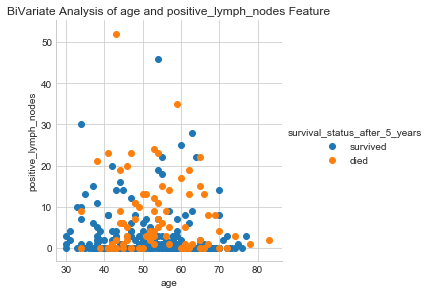

In [151]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df ,hue="survival_status_after_5_years",size=4).map(plt.scatter,"age","positive_lymph_nodes").add_legend()
plt.title("BiVariate Analysis of age and positive_lymph_nodes Feature");
plt.show()

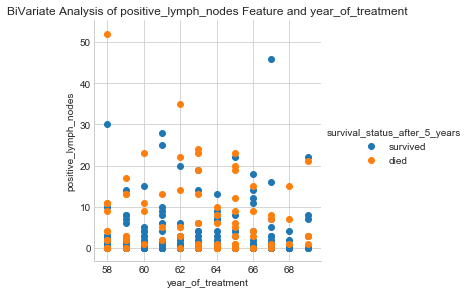

In [152]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman_df ,hue="survival_status_after_5_years",size=4).map(plt.scatter,"year_of_treatment","positive_lymph_nodes").add_legend();
plt.title("BiVariate Analysis of positive_lymph_nodes Feature and year_of_treatment")
plt.show()

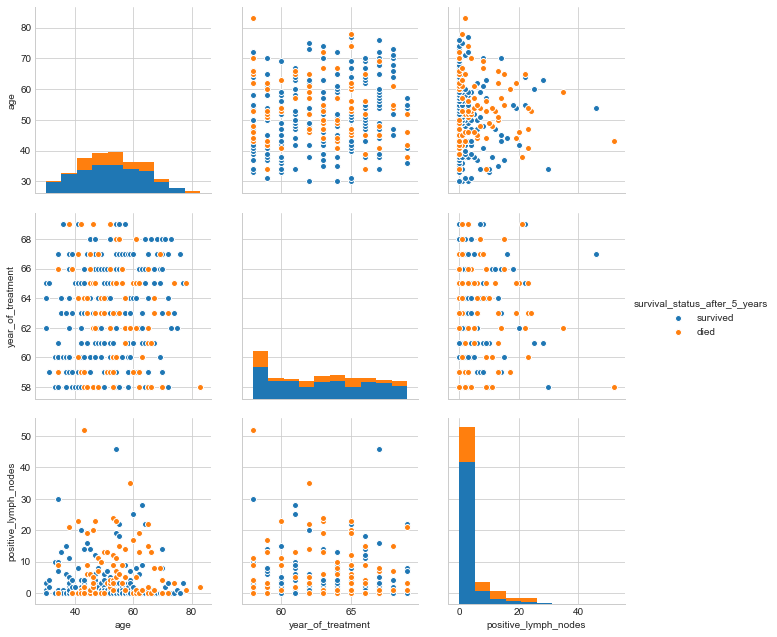

In [153]:
# Pair Plot
sns.set_style("whitegrid");
sns.pairplot(haberman_df,hue="survival_status_after_5_years",vars=['age','year_of_treatment','positive_lymph_nodes'],size=3);
plt.show()

# Observation

1. As we are unable to classify which is the most useful feature pair because of too much overlapping.And hence, this plot is not much informative in this case.

# Conclusion

1. Given dataset is Unbalanced , because the number of survived data is 225 and died is 81.
2. The given dataset is not linearly seprable from each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.only positive lymph nodes feature is giving some intuition.